<a href="https://colab.research.google.com/github/rithikavishwanath/FaceShape_decection-using-cnn_dropout_resnet50v2/blob/main/Face_shape_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow import keras
from keras import Sequential
from tensorflow.keras.models import Model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, MaxPooling2D, Dropout
from keras.applications.resnet_v2 import ResNet50V2
from keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping as ES



In [2]:
batch_size=64
epcohs=10
image_shape=(224,224)

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d zeyadkhalid/faceshape-processed

 87% 69.0M/79.8M [00:00<00:00, 115MB/s] 
100% 79.8M/79.8M [00:00<00:00, 94.3MB/s]


In [5]:
import zipfile
zip_ref= zipfile.ZipFile('/content/faceshape-processed.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
train_ds='/content/dataset/train'
test_ds='/content/dataset/test'

In [7]:
train_ds

'/content/dataset/train'

In [8]:
label_names=sorted(os.listdir(train_ds))
label_names

['Heart', 'Oblong', 'Oval', 'Round', 'Square']

In [9]:
train_gen=ImageDataGenerator(rescale=(1./255.), validation_split=0.2)
val_gen = ImageDataGenerator(rescale=(1./255.))

In [10]:
ds_train = train_gen.flow_from_directory(train_ds,
                                         target_size=image_shape,
                                         batch_size=batch_size, 
                                         subset='training', 
                                         class_mode='categorical',
                                         shuffle=True
                                         )


ds_val = train_gen.flow_from_directory(train_ds,
                                       target_size=image_shape,
                                       batch_size=batch_size, 
                                       subset='validation', 
                                       class_mode='categorical'
                                       )
ds_test = val_gen.flow_from_directory(test_ds,
                                      target_size=image_shape,
                                      batch_size=batch_size, 
                                      class_mode='categorical'
                                    )

Found 3188 images belonging to 5 classes.
Found 793 images belonging to 5 classes.
Found 998 images belonging to 5 classes.


In [11]:
ds_train

In [12]:
# basic cnn model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding ='valid', activation='relu', input_shape=(image_shape[0],image_shape[1], 3)))
model.add(Conv2D(64, kernel_size=(3,3), padding ='valid', activation='relu', ))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding ='valid', activation='relu', ))
model.add(Conv2D(64, kernel_size=(3,3), padding ='valid', activation='relu', ))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3), padding ='valid', activation='relu', ))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))



model.add(Flatten())


model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='sigmoid'))

In [13]:
model.compile(loss=['categorical_crossentropy'],
              optimizer='adam',
              metrics=['accuracy']
              )

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

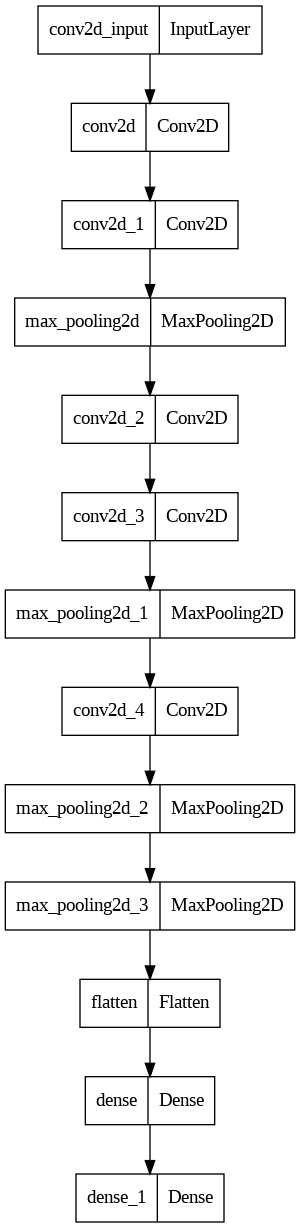

In [15]:
plot_model(model)

In [16]:
history = model.fit(ds_train,
                   validation_data=ds_val,
                   epochs=10,
                   steps_per_epoch=len(ds_train),
                   validation_steps=len(ds_val)
                  #  callbacks=[ES(monitor="val_loss", patience=5)]
                  )

Epoch 1/10
50/50 [==============================] - 34s 372ms/step - loss: 1.6438 - accuracy: 0.2202 - val_loss: 1.6386 - val_accuracy: 0.2358
Epoch 2/10
50/50 [==============================] - 14s 286ms/step - loss: 1.4125 - accuracy: 0.4109 - val_loss: 1.3640 - val_accuracy: 0.4073
Epoch 3/10
50/50 [==============================] - 15s 300ms/step - loss: 1.2121 - accuracy: 0.5066 - val_loss: 1.2674 - val_accuracy: 0.4931
Epoch 4/10
50/50 [==============================] - 15s 294ms/step - loss: 1.0804 - accuracy: 0.5678 - val_loss: 1.1648 - val_accuracy: 0.5372
Epoch 5/10
50/50 [==============================] - 16s 311ms/step - loss: 0.9607 - accuracy: 0.6339 - val_loss: 1.1383 - val_accuracy: 0.5750
Epoch 6/10
50/50 [==============================] - 15s 305ms/step - loss: 0.8183 - accuracy: 0.6910 - val_loss: 1.1149 - val_accuracy: 0.5738
Epoch 7/10
50/50 [==============================] - 15s 298ms/step - loss: 0.7029 - accuracy: 0.7331 - val_loss: 1.0715 - val_accuracy: 0.6091

In [19]:
scoreSeg = model.evaluate_generator(ds_test)
print("Accuracy = ",scoreSeg[1])

<ipython-input-19-6c8c5a88ed80>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scoreSeg = model.evaluate_generator(ds_test)


Accuracy =  0.6412825584411621


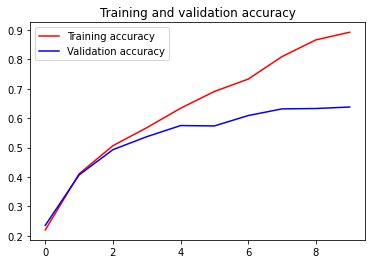

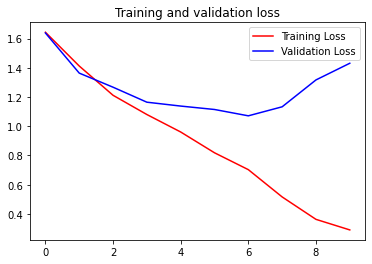

In [20]:
# Visualize Loss & Accuracy

%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
# cnn model with dropout

model1 = Sequential()

model1.add(Conv2D(32, kernel_size=(3,3), padding ='valid', activation='relu', input_shape=(image_shape[0],image_shape[1], 3)))
model1.add(Conv2D(64, kernel_size=(3,3), padding ='valid', activation='relu', ))
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model1.add(Conv2D(64, kernel_size=(3,3), padding ='valid', activation='relu', ))
model1.add(Dropout(0.2))
model1.add(Conv2D(128, kernel_size=(3,3), padding ='valid', activation='relu', ))
model1.add(Dropout(0.2))

model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model1.add(Conv2D(128, kernel_size=(3,3), padding ='valid', activation='relu', ))
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))



model1.add(Flatten())


model1.add(Dense(1024, activation='relu'))
model1.add(Dense(5, activation='sigmoid'))

In [25]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 dropout (Dropout)           (None, 108, 108, 64)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 106, 106, 128)     73856     
                                                      

In [26]:
model1.compile(loss=['categorical_crossentropy'],
              optimizer='adam',
              metrics=['accuracy']
              )

history_dropout = model1.fit(ds_train,
                   validation_data=ds_val,
                   epochs=10,
                   steps_per_epoch=len(ds_train),
                   validation_steps=len(ds_val)
                  #  callbacks=[ES(monitor="val_loss", patience=5)]
                  )

Epoch 1/10
50/50 [==============================] - 33s 576ms/step - loss: 1.7133 - accuracy: 0.1992 - val_loss: 1.6094 - val_accuracy: 0.2219
Epoch 2/10
50/50 [==============================] - 26s 526ms/step - loss: 1.5751 - accuracy: 0.2663 - val_loss: 1.5000 - val_accuracy: 0.3279
Epoch 3/10
50/50 [==============================] - 26s 523ms/step - loss: 1.3875 - accuracy: 0.4072 - val_loss: 1.4364 - val_accuracy: 0.3808
Epoch 4/10
50/50 [==============================] - 26s 525ms/step - loss: 1.2680 - accuracy: 0.4702 - val_loss: 1.3168 - val_accuracy: 0.4578
Epoch 5/10
50/50 [==============================] - 26s 528ms/step - loss: 1.2210 - accuracy: 0.5075 - val_loss: 1.2795 - val_accuracy: 0.4830
Epoch 6/10
50/50 [==============================] - 27s 529ms/step - loss: 1.1722 - accuracy: 0.5279 - val_loss: 1.2876 - val_accuracy: 0.4805
Epoch 7/10
50/50 [==============================] - 26s 525ms/step - loss: 1.1229 - accuracy: 0.5489 - val_loss: 1.2490 - val_accuracy: 0.4968

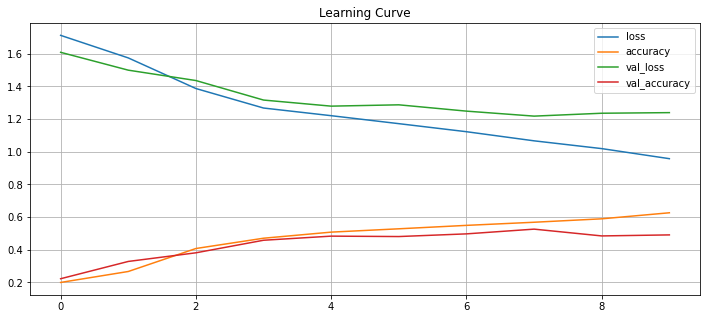

In [28]:
learningcurve = pd.DataFrame(history_dropout.history)
learningcurve.plot(figsize=(12, 5))
plt.title("Learning Curve")
plt.grid()

In [31]:
def my_model():
  base_model=ResNet50V2(
      include_top=False,
      weights="imagenet",
      input_shape=(224, 224, 3)
  )
  base_model_output=base_model.output
  x = Flatten()(base_model_output)
  x = Dense(512, activation='relu')(x)
  x = Dense(len(label_names), activation='softmax')(x)
    
  model = Model(inputs=base_model.input, outputs=x)
  return model

In [32]:
resnet_model=my_model()

94668760/94668760 [==============================] - 0s 0us/step


In [33]:
resnet_model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
              )

In [34]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [35]:
history_resnet = resnet_model.fit(ds_train,
                   validation_data=ds_val,
                   epochs=10,
                   steps_per_epoch=len(ds_train),
                   validation_steps=len(ds_val),
                   callbacks=[ES(monitor="val_loss", patience=5)])

Epoch 1/10
50/50 [==============================] - 57s 833ms/step - loss: 2.1383 - accuracy: 0.3645 - val_loss: 1.5554 - val_accuracy: 0.3090
Epoch 2/10
50/50 [==============================] - 32s 640ms/step - loss: 0.8363 - accuracy: 0.6917 - val_loss: 1.3930 - val_accuracy: 0.4527
Epoch 3/10
50/50 [==============================] - 32s 647ms/step - loss: 0.1813 - accuracy: 0.9545 - val_loss: 1.1530 - val_accuracy: 0.5649
Epoch 4/10
50/50 [==============================] - 33s 658ms/step - loss: 0.0234 - accuracy: 0.9991 - val_loss: 1.0022 - val_accuracy: 0.6393
Epoch 5/10
50/50 [==============================] - 32s 646ms/step - loss: 0.0094 - accuracy: 0.9991 - val_loss: 1.0027 - val_accuracy: 0.6583
Epoch 6/10
50/50 [==============================] - 32s 645ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.0215 - val_accuracy: 0.6721
Epoch 7/10
50/50 [==============================] - 33s 657ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.0420 - val_accuracy: 0.6721

In [36]:
scoreSeg = model.evaluate_generator(ds_test)
print("Accuracy = ",scoreSeg)

<ipython-input-36-2ba817717bac>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scoreSeg = model.evaluate_generator(ds_test)


Accuracy =  [1.4619245529174805, 0.6412825584411621]


In [37]:
score_cnn = model.evaluate_generator(ds_test)
print("Accuracy from the cnn we made= ",score_cnn[1])

score_dropout = model1.evaluate_generator(ds_test)
print("Accuracy from the drop-out we made= ",score_dropout[1])

score_resnet= resnet_model.evaluate_generator(ds_test)
print("Accuracy from the drop-out we made= ",score_resnet[1])

<ipython-input-37-3f79690e557e>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score_cnn = model.evaluate_generator(ds_test)


Accuracy from the cnn we made=  0.6412825584411621


<ipython-input-37-3f79690e557e>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score_dropout = model1.evaluate_generator(ds_test)


Accuracy from the drop-out we made=  0.531062126159668


<ipython-input-37-3f79690e557e>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score_resnet= resnet_model.evaluate_generator(ds_test)


Accuracy from the drop-out we made=  0.6673346757888794


In [38]:
print("Accuracy from the cnn we made= ",score_cnn[1]*100)
print("Accuracy from the drop-out we made= ",score_dropout[1]*100)
print("Accuracy from the drop-out we made= ",score_resnet[1]*100)

Accuracy from the cnn we made=  64.12825584411621
Accuracy from the drop-out we made=  53.1062126159668
Accuracy from the drop-out we made=  66.73346757888794
